In [16]:
!pip install pandas-profiling==3.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.7 MB/

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
df = pd.read_excel('Data.xlsx')

In [4]:
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate UnitPrice  CustomerID         Country  
0  2010-01-12 08:26:00      2.55     17850.0  United Kingdom  
1  2010-01-12 08:26:00      3.39     17850.0  United Kingdom  
2  2010-01-12 08:26:00      2.75     17850.0  United Kingdom  
3  2010-01-12 08:26:00      3.39     17850.0  United Kingdom  
4  2010-01-12 08:26:00      3.39     17850.0  United Kingdom  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB
None


In [10]:
description = df.describe()

print(description)

            Quantity     CustomerID
count  541909.000000  406829.000000
mean        9.552250   15287.690570
std       218.081158    1713.600303
min    -80995.000000   12346.000000
25%         1.000000   13953.000000
50%         3.000000   15152.000000
75%        10.000000   16791.000000
max     80995.000000   18287.000000


In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
CustomerID,135080,24.93%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [12]:
df.isna().sum().to_frame('missing_count').assign(missing_pct = lambda x: x.div(len(df))).sort_values('missing_count', ascending=False)

,missing_count,missing_pct
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [16]:
df.dropna(inplace=True)

In [18]:
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

In [19]:
print(df[df['UnitPrice'].isnull() | (df['UnitPrice'] < 0)])

       InvoiceNo StockCode                     Description  Quantity  \
10        536367     22745       POPPY'S PLAYHOUSE BEDROOM         6   
11        536367     22748       POPPY'S PLAYHOUSE KITCHEN         6   
53        536373     37370      RETRO COFFEE MUGS ASSORTED         6   
54        536373     21871             SAVE THE PLANET MUG         6   
55        536373     21071  VINTAGE BILLBOARD DRINK ME MUG         6   
...          ...       ...                             ...       ...   
541847    581580     22144  CHRISTMAS CRAFT LITTLE FRIENDS         1   
541863    581582     23552     BICYCLE PUNCTURE REPAIR KIT         6   
541874    581585     23084              RABBIT NIGHT LIGHT        12   
541893    581586     20685           DOORMAT RED RETROSPOT        10   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL         6   

                InvoiceDate  UnitPrice  CustomerID         Country  
10      2010-01-12 08:34:00        NaN     13047.0  United Kingdom

In [20]:
df = df[df['UnitPrice'] > 0]

In [21]:
print(df[df['Quantity'].isnull() | (df['Quantity'] < 0)])

       InvoiceNo StockCode                       Description  Quantity  \
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE       -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES       -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES       -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES       -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  
154     2010-01-12 09:49:00       4.65    

In [22]:
df = df[df['Quantity'] > 0]

In [24]:
# Verificar se há linhas duplicadas no DataFrame
duplicates = df.duplicated()

In [25]:
if duplicates.any():
    print("Linhas duplicadas encontradas:")
    print(df[duplicates])
else:
    print("Não há linhas duplicadas no DataFrame.")

Linhas duplicadas encontradas:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
537       536409     22900     SET 2 TEA TOWELS I LOVE LONDON         1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
587       536412     22273               FELTCRAFT DOLL MOLLY         1   
...          ...       ...                                ...       ...   
541611    581514     22075        6 RIBBONS ELEGANT CHRISTMAS        24   
541655    581538     23275   SET OF 3 HANGING OWLS OLLIE BEAK         1   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992              REVOLVER WOODEN RULER         1   

                InvoiceDate  UnitPrice  CustomerID         Country  

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541903    581587     23256           CHILDRENS CUTLERY SPACEBOY         4   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

                InvoiceDate  UnitPrice  CustomerID         Country  
0     

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350562 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    350562 non-null  object 
 1   StockCode    350562 non-null  object 
 2   Description  350562 non-null  object 
 3   Quantity     350562 non-null  int64  
 4   InvoiceDate  350562 non-null  object 
 5   UnitPrice    350562 non-null  float64
 6   CustomerID   350562 non-null  float64
 7   Country      350562 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.1+ MB
None


In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [30]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350562 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    350562 non-null  object        
 1   StockCode    350562 non-null  object        
 2   Description  350562 non-null  object        
 3   Quantity     350562 non-null  int64         
 4   InvoiceDate  350562 non-null  datetime64[ns]
 5   UnitPrice    350562 non-null  float64       
 6   CustomerID   350562 non-null  int64         
 7   Country      350562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.1+ MB
None


In [32]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541903    581587     23256           CHILDRENS CUTLERY SPACEBOY         4   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [33]:
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]


In [34]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541903    581587     23256           CHILDRENS CUTLERY SPACEBOY         4   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [35]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [36]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541903    581587     23256           CHILDRENS CUTLERY SPACEBOY         4   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPri

In [37]:
last_purchase_date = df['InvoiceDate'].max()

In [39]:
print(f"A data da última compra no dataset é: {last_purchase_date}")

A data da última compra no dataset é: 2011-12-10 17:19:00


In [42]:
total_sales_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)


In [43]:
top_10_countries = total_sales_country.head(10)


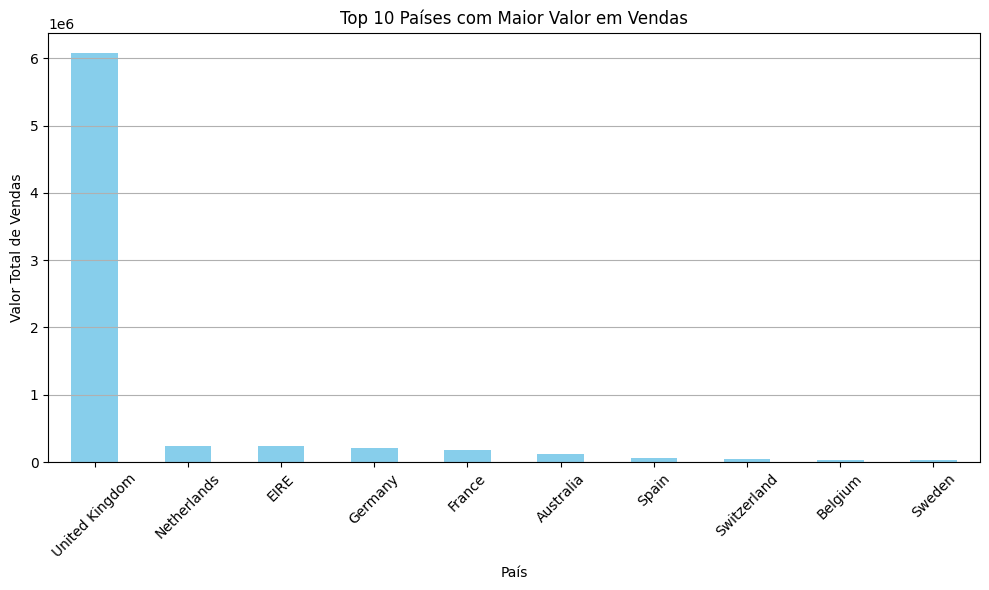

In [44]:
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [47]:
total_quantity_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [48]:
top_10_products = total_quantity_product.head(10)


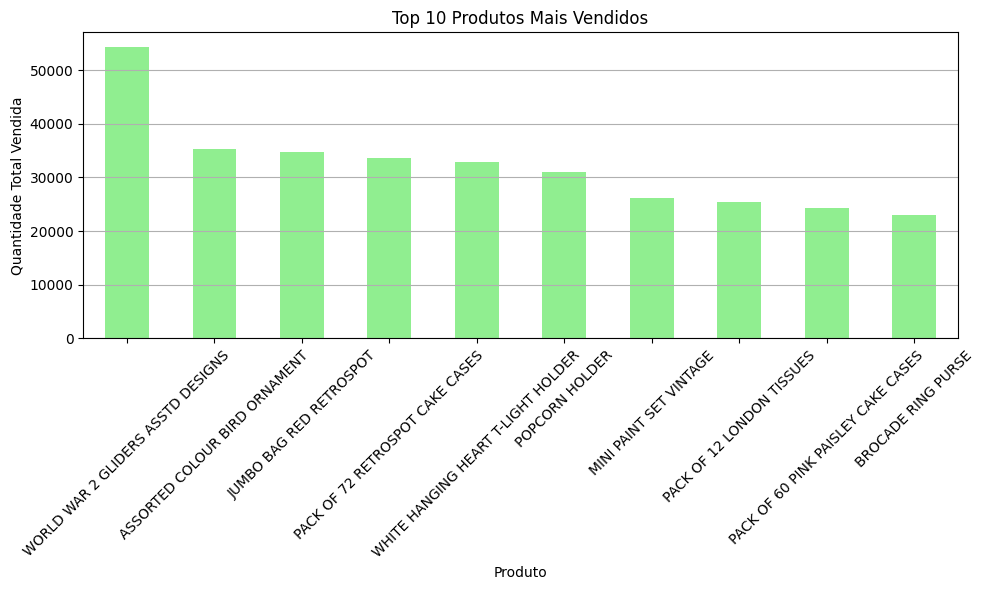

In [49]:
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [50]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

In [51]:
total_sales_month = df.groupby('Month')['TotalPrice'].sum()

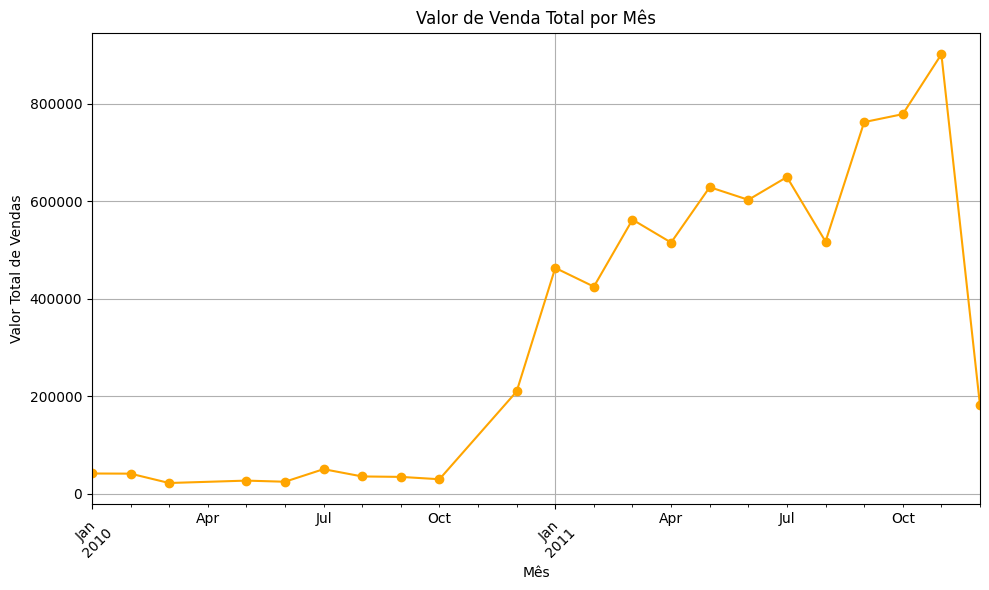

In [52]:
plt.figure(figsize=(10, 6))
total_sales_month.plot(kind='line', marker='o', color='orange')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [53]:
total_sales_month_country = df.groupby(['Month', 'Country'])['TotalPrice'].sum().reset_index()


In [54]:
top_10_countries = total_sales_month_country.groupby('Country')['TotalPrice'].sum().nlargest(10).index


In [55]:
total_sales_month_country_top_10 = total_sales_month_country[total_sales_month_country['Country'].isin(top_10_countries)]


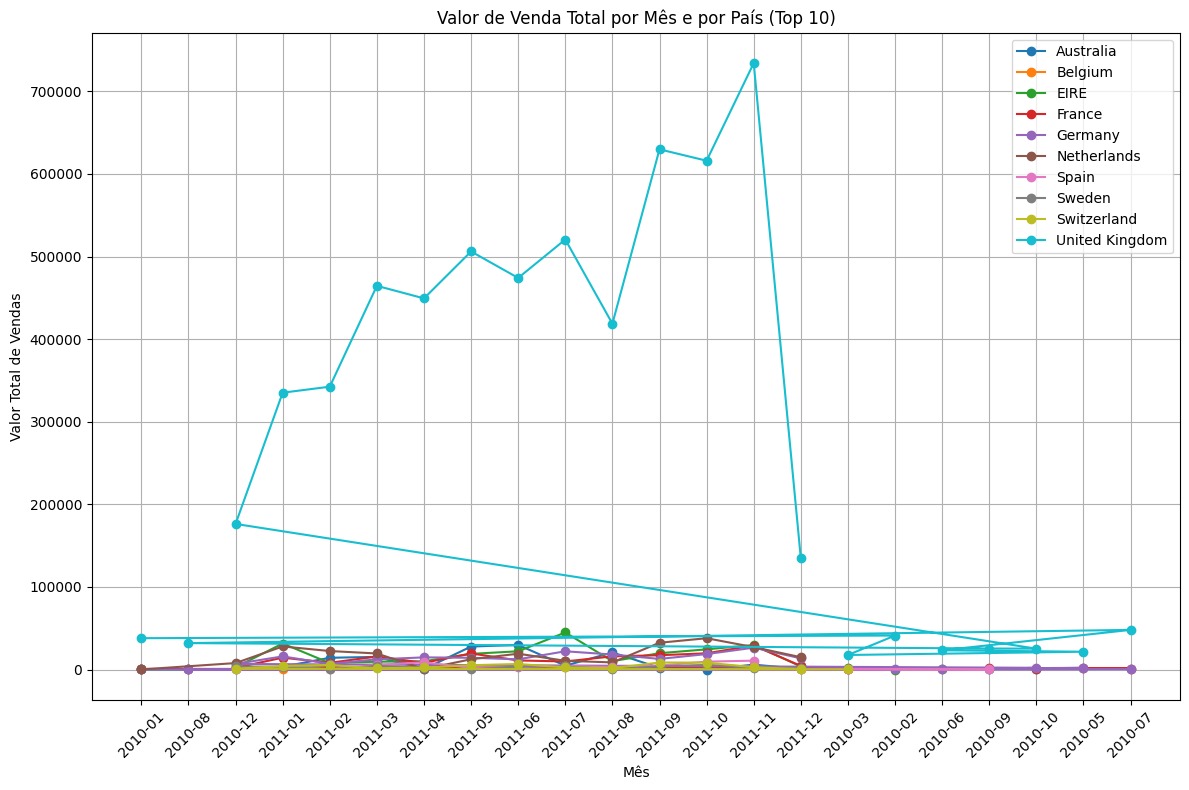

In [60]:
plt.figure(figsize=(12, 8))
for country, data in total_sales_month_country_top_10.groupby('Country'):
    plt.plot(data['Month'], data['TotalPrice'], marker='o', label=country)

plt.title('Valor de Venda Total por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [63]:
grouped = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',         # Última data de compra por pedido
    'TotalPrice': 'sum'           # Total gasto por pedido
}).reset_index()

In [64]:
#Recência (R)
last_purchase_date = df['InvoiceDate'].max()  # Última data de compra no dataset
grouped['Recency'] = (last_purchase_date - grouped['InvoiceDate']).dt.days

In [65]:
# Frequência (F)
frequency = grouped.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

In [66]:
# Ticket Médio (M)
average_spent = grouped.groupby('CustomerID')['TotalPrice'].mean().reset_index()
average_spent.columns = ['CustomerID', 'Avg_Spent']

In [67]:
rfm = pd.merge(frequency, average_spent, on='CustomerID')
rfm['Recency'] = grouped.groupby('CustomerID')['Recency'].min().values

In [68]:
print(rfm.head())

   CustomerID  Frequency    Avg_Spent  Recency
0       12347          7   556.811429       40
1       12348          4   449.310000       76
2       12349          1  1662.970000       19
3       12350          1   233.600000      311
4       12352          8   298.970000       73
